In [5]:
# Testing Julia code for computing transit light curves

include("phot.jl")
using PyPlot

In [2]:
function compute_theta(bp, bpm, bm)   
  a = bp; b = bpm; c = bm
  if a > b
    tmp = b
    b = a
    a = tmp
  end
  if b > c
    mu = c - (a - b)
  else
    mu = b - (a - c)
  end
  theta = 2 * atan(sqrt(((a - b) + c) * mu / ((a + (b + c)) * ((a - c) + b))))
  return theta
end    

compute_theta (generic function with 1 method)

In [3]:
function compute_lightcurve(param::Array{T,1},t::Array{T,1}) where {T <: Real}
c1,c2,rp,rm,byp,bym,vp,vm,t0p,t0m = param
# We'll assume parallel, straight-lined paths with minimum
# impact parameters of byp & bym, velocities
# of vp & vm, and central transit times of t0p & t0m.
# The two limb-darkening parameters are c1 & c2.
# The radius ratios are rp & rm.
# Compute the impact parameters:
  b(b0,v,t0,t) = sqrt(b0^2+(v*(t-t0))^2)
# Next, compute impact parameter between planet and moon:
  bdiff(byp,bym,vp,vm,t0p,t0m,t) = sqrt((byp-bym)^2+(vp*(t-t0p)-vm*(t-t0m))^2)
  bp = b.(byp,vp,t0p,t)
  bm = b.(bym,vm,t0m,t)
  nt = length(t)
  lc = zeros(T,8,nt)
  bpm = bdiff.(byp,bym,vp,vm,t0p,t0m,t)
  theta = compute_theta.(bp,bpm,bm)
  cth = cos.(theta)
  sth = sin.(theta)
  flux!(c1, c2, rp, rm, bp, bpm, cth, sth, lc, nt)
  return lc
end

compute_lightcurve (generic function with 1 method)

In [13]:
c1 = 0.1; c2 = 0.5; rp = 0.2; rm = 0.05
byp = 0.5; bym = 0.6
# And constant velocities for the planet and moon:
vp = 0.1; vm = 0.2
t0p = 0.0; t0m = 0.0

# Contact points: 1). planet & moon:
tc1 =  sqrt(((rp-rm)^2-(byp-bym)^2))/(vm-vp)
tc2 =  sqrt(((rp+rm)^2-(byp-bym)^2))/(vm-vp)


# 2). Moon & star:
tc3 = sqrt((1-rm)^2-bym^2)/vm
tc4 = sqrt((1+rm)^2-bym^2)/vm
# 2). Planet & star:
tc5 = sqrt((1-rp)^2-byp^2)/vp
tc6 = sqrt((1+rp)^2-byp^2)/vp
# Time array:
#t = collect(0.0:0.0001:12.0)
tclose = exp10.(collect(-15.0:0.01:-2.0))
t = sort([collect(0.0:0.0001:12.0);tc1.+tclose;tc2.-tclose;tc3.+tclose;tc4.-tclose;tc5.+tclose;tc6.-tclose])


param = [c1,c2,rp,rm,byp,bym,vp,vm,t0p,t0m]
 

@time lc = compute_lightcurve(param,t);

  1.144702 seconds (16.06 M allocations: 673.396 MiB, 39.32% gc time)


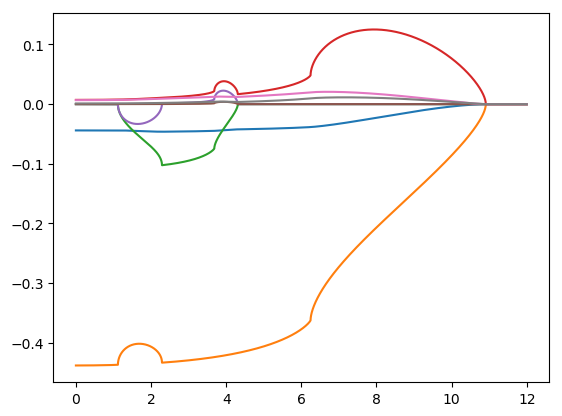

In [14]:
pygui(false)
clf()
for j=1:8
  plot(t,lc[j,:])
end

In [ ]:
# Now, estimate the precision of these calculations...


In [8]:
# ...and then check the derivatives:

c1b = big(0.3); c2b = big(0.3); rpb = big(0.2); rmb = big(0.05);
bypb = big(0.5); bymb = big(0.6)
# And constant velocities for the planet and moon:
vpb = big(0.1); vmb = big(0.2)
t0pb = big(0.0); t0mb = big(0.0)

tb = big.(t)
paramb = [c1b,c2b,rpb,rmb,bypb,bymb,vpb,vmb,t0pb,t0mb]

@time lcb = compute_lightcurve(paramb,tb);

 39.242801 seconds (258.22 M allocations: 13.307 GiB, 10.24% gc time, 13.53% compilation time)


1 7.813194535799539e-15
2 3.035993068056797e-9
3 3.1505721226343653e-9
4 1.8485853334193614e-9
5 2.0412062187812072e-9
6 2.662663197566806e-10
7 8.642392357316453e-15


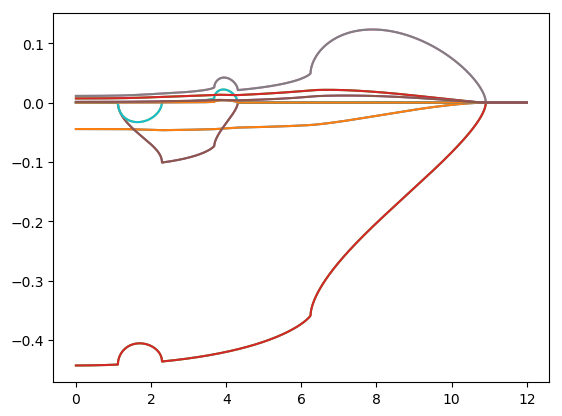

8 1.7322948631104396e-14


In [12]:
pygui(false)
clf()
for j=1:8
  plot(t,convert(Array{Float64,1},lcb[j,:]))
  plot(t,lc[j,:])
  # plot(t,convert(Array{Float64,1},lcb[j,:]) .- lc[j,:])
  println(j," ",maximum(abs.(convert(Array{Float64,1},lcb[j,:]) .- lc[j,:])))
end

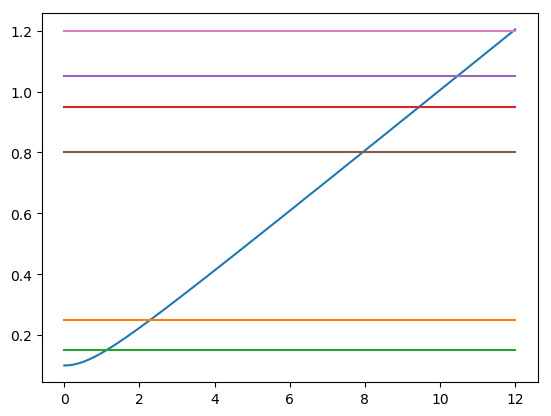

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x1642dce48>

In [91]:
#=
b(b0,v,t0,t) = sqrt(b0^2+(v*(t-t0))^2)
# Next, compute impact parameter between planet and moon:
  bdiff(byp,bym,vp,vm,t0p,t0m,t) = sqrt((byp-bym)^2+(vp*(t-t0p)-vm*(t-t0m))^2)
  bp = b.(byp,vp,t0p,t)
  bm = b.(bym,vm,t0m,t)
  bpm = bdiff.(byp,bym,vp,vm,t0p,t0m,t)

plot(t,bpm)
plot([0,12],[1,1]*(rp+rm))
plot([0,12],[1,1]*(rp-rm))
plot([0,12],[1,1]*(1-rm))
plot([0,12],[1,1]*(1+rm))
plot([0,12],[1,1]*(1-rp))
plot([0,12],[1,1]*(1+rp))
=#

In [101]:
length(t)

120367